In [1]:
import os
import tarfile
from six.moves import urllib

In [2]:
# Getting the Data

In [3]:
 DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
 HOUSING_PATH = "datasets/housing"
 HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

In [4]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH): 
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [5]:
fetch_housing_data()

In [6]:
# Opening data in pandas dataframe

In [7]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH): 
    csv_path = os.path.join(housing_path, "housing.csv") 
    return pd.read_csv(csv_path)

In [8]:
data = load_housing_data()

In [9]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [12]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


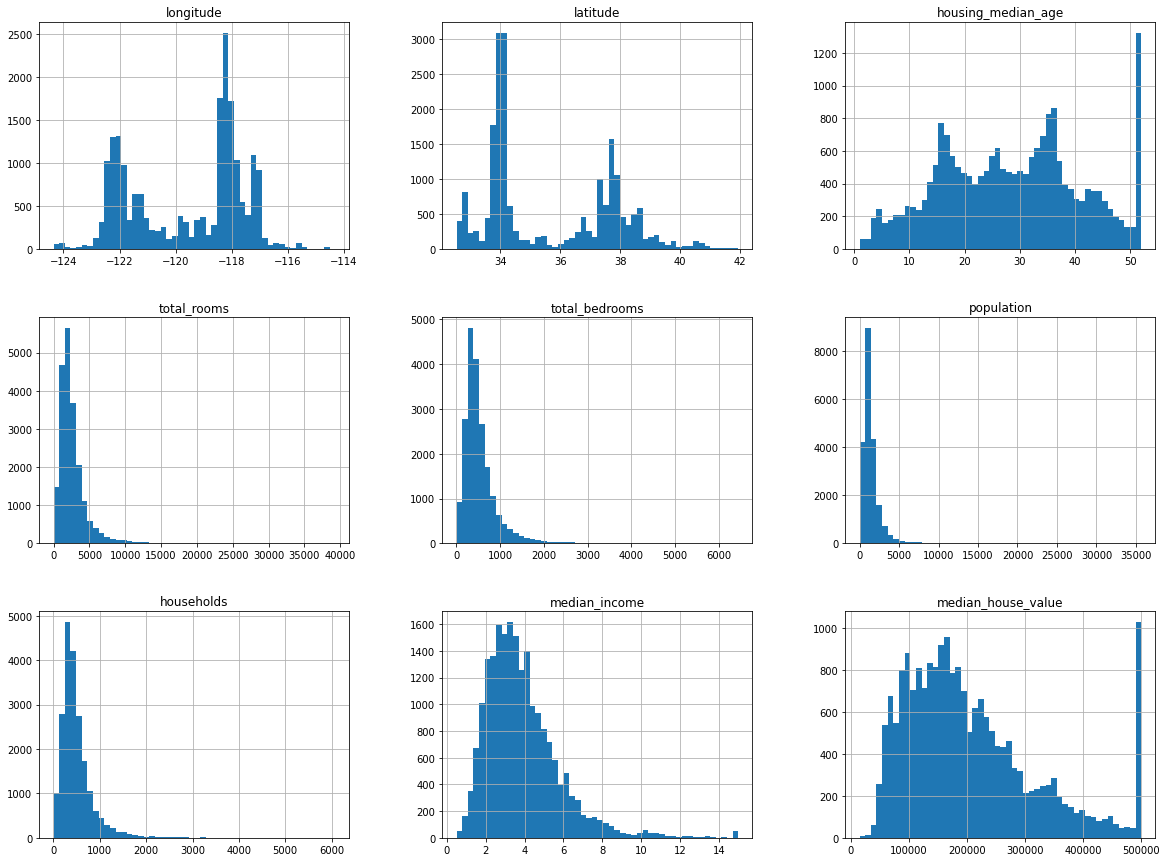

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt 
data.hist(bins=50, figsize=(20,15)) 
plt.show()

In [14]:
# Create test set

In [15]:
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data)) 
    test_set_size = int(len(data) * test_ratio) 
    test_indices = shuffled_indices[:test_set_size] 
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [16]:
np.random.seed(42)
train_set, test_set = split_train_test(data, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [17]:
# creating training and testing set for data

In [18]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [19]:
data["income_cat"] = np.ceil(data["median_income"] / 1.5)

In [20]:
data["income_cat"].where(data["income_cat"] < 5, 5.0, inplace=True)

In [21]:
# created 5 bins for the median income to be because the data was heavily right skewed

<Axes: >

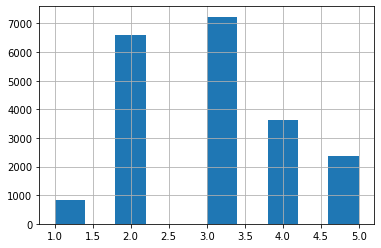

In [22]:
data.income_cat.hist()

In [23]:
# stratified shuffle in order to ensure training and test split accurately model the data everytime without sampling bias

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) 
for train_index, test_index in split.split(data, data["income_cat"]):
        strat_train_set = data.loc[train_index]
        strat_test_set = data.loc[test_index]

In [25]:
data["income_cat"].value_counts() / len(data)

income_cat
3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: count, dtype: float64

In [26]:
for set in (strat_train_set, strat_test_set): 
    set.drop(["income_cat"], axis=1, inplace=True)

In [27]:
# Visulizing Geographical Data

In [28]:
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

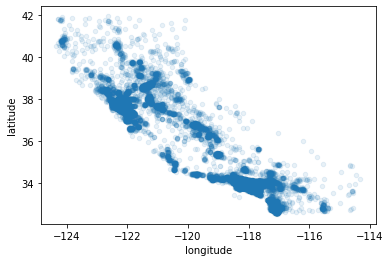

In [29]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1) # changing alpha helps see the density

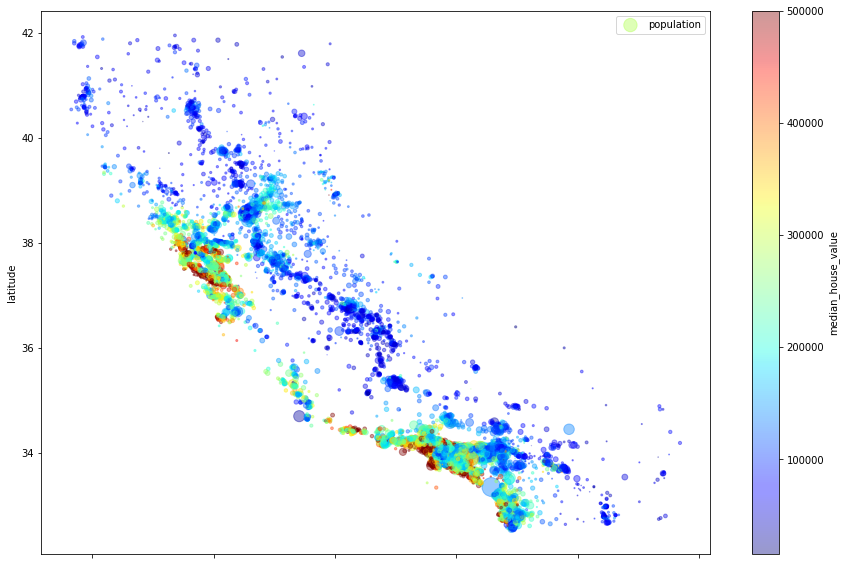

In [30]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population",
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, figsize=(15,10))
plt.legend()

In [31]:
# Looking for Correlations

In [32]:
coor_matrix = housing.drop("ocean_proximity",axis=1).corr()

In [33]:
coor_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [34]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

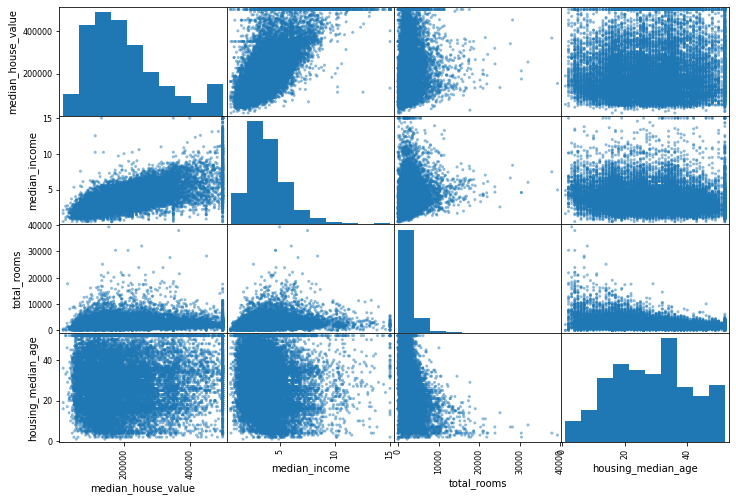

In [35]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

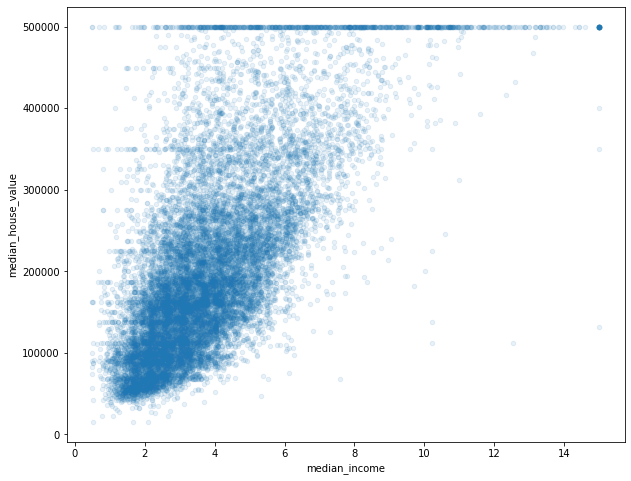

In [36]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1,figsize=(10,8))

May want to remove the vertical lines in your dataset as this would cause your model to cap. Also the lines around 350,000 and 450,000 may be removed as well to improve model. 

In [37]:
# Experimenting with Attribute Combinations 

In [38]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [39]:
corr_matrix = housing.drop("ocean_proximity",axis=1).corr()

In [40]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [41]:
# Prepare the Data for Machine Learning Algorithms 

In [42]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [43]:
# Handling Missing Values

In [44]:
housing.dropna(subset=["total_bedrooms"]) # option 1

housing.drop("total_bedrooms", axis=1) # option 2

median = housing["total_bedrooms"].median() # option 3
housing["total_bedrooms"].fillna(median)

17606     351.0
18632     108.0
14650     471.0
3230      371.0
3555     1525.0
          ...  
6563      236.0
12053     294.0
13908     872.0
11159     380.0
15775     682.0
Name: total_bedrooms, Length: 16512, dtype: float64

In [45]:
from sklearn.impute import SimpleImputer

In [46]:
imputer = SimpleImputer(strategy="median")

In [47]:
housing_num = housing.drop("ocean_proximity",axis=1)

In [48]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [49]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [50]:
np.array(housing_num.median())

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [51]:
X = imputer.transform(housing_num)

In [52]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [53]:
# Handling Text and Categorical Attributes

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [56]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [57]:
# One-hot encoding 
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [58]:
# Custom Transformers 

In [59]:
# Feature Scaling

In [60]:
# Transformation Pipeline

In [61]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler

In [62]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
     ('std_scalar',StandardScaler())])

In [63]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [64]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.63621141,
        -0.42069842, -0.61493744],
       [-1.17602483,  0.6596948 , -1.1653172 , ..., -0.99833135,
        -1.02222705,  1.33645936],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.43363936,
        -0.0933178 , -0.5320456 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.60790363,
         0.71315642, -0.3167053 ],
       [ 0.78221312, -0.85106801,  0.18664186, ..., -0.05717804,
        -0.37545069,  0.09812139],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.13515931,
         0.3777909 , -0.15779865]])

In [65]:
# Pipeline for Both Categorical and Numerical Data

In [66]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelBinarizer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

In [67]:
median = housing["total_bedrooms"].median() # option 3
housing["total_bedrooms"] = housing["total_bedrooms"].fillna(median)

In [134]:
ct = ColumnTransformer(
    [
        #("imputer", SimpleImputer(strategy="median",fill_value=0), num_attribs), # this imputer messes it up
        ("std_scaler", StandardScaler(), num_attribs),
        ("one_hot_encoder", OneHotEncoder(), cat_attribs)
    ])

In [135]:
housing_prepared = ct.fit_transform(housing)

In [133]:
housing_prepared.shape

(16512, 13)

In [71]:
# Select and Train Model!

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [74]:
# Measuring error

In [75]:
from sklearn.metrics import mean_squared_error

In [76]:
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

69050.98178244587

In [77]:
from sklearn.tree import DecisionTreeRegressor

In [78]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [79]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [80]:
from sklearn.model_selection import cross_val_score

In [81]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [82]:
rmse_scores

array([67994.69198613, 67080.50993756, 73402.2702027 , 68357.76844309,
       69299.23849865, 74409.74031147, 68684.81459937, 70736.87512892,
       71330.67371331, 69363.38697653])

In [83]:
print("Scores:", rmse_scores)
print("Mean:", rmse_scores.mean())
print("Standard deviation:", rmse_scores.std())

Scores: [67994.69198613 67080.50993756 73402.2702027  68357.76844309
 69299.23849865 74409.74031147 68684.81459937 70736.87512892
 71330.67371331 69363.38697653]
Mean: 70065.99697977302
Standard deviation: 2261.836334120293


In [84]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [85]:
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [86]:
scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [87]:
print("Scores:", rmse_scores)
print("Mean:", rmse_scores.mean())
print("Standard deviation:", rmse_scores.std())

Scores: [48064.90437323 45971.18648814 49032.68419671 49919.32523573
 49149.14096211 53612.55962922 48962.74630505 50253.20445047
 51624.3079254  49630.14801977]
Mean: 49622.02075858158
Standard deviation: 1928.1903752449023


In [88]:
# Saving your model for future use

In [89]:
import joblib
joblib.dump(forest_reg, "my_model.pkl")


['my_model.pkl']

In [90]:
my_model_loaded = joblib.load("my_model.pkl") # loading model back into notebook

In [91]:
# Grid Search to Finetune model 

In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                               scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [94]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [95]:
print(best_params)
print(best_model)

{'max_features': 6, 'n_estimators': 30}
RandomForestRegressor(max_features=6, n_estimators=30)


In [96]:
# Results of each model
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64693.94621358577 {'max_features': 2, 'n_estimators': 3}
55678.93760947466 {'max_features': 2, 'n_estimators': 10}
52662.192198792334 {'max_features': 2, 'n_estimators': 30}
60821.77797521078 {'max_features': 4, 'n_estimators': 3}
52531.814398524235 {'max_features': 4, 'n_estimators': 10}
50686.995694972415 {'max_features': 4, 'n_estimators': 30}
58643.60278700601 {'max_features': 6, 'n_estimators': 3}
52478.55288821565 {'max_features': 6, 'n_estimators': 10}
50227.729469360456 {'max_features': 6, 'n_estimators': 30}
58582.00734760848 {'max_features': 8, 'n_estimators': 3}
52699.71556231479 {'max_features': 8, 'n_estimators': 10}
50229.509229301526 {'max_features': 8, 'n_estimators': 30}
62444.9230218636 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54283.094500920364 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59409.46657901347 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53025.97527829148 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [104]:
# Analyze the Best Models and their Errors

In [106]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importantces

array([1.28524540e-01, 1.27625411e-01, 4.61031448e-02, 3.71029424e-02,
       2.94613784e-02, 4.27261123e-02, 2.76582431e-02, 4.01918752e-01,
       1.70216673e-02, 1.31112902e-01, 8.07891944e-05, 2.90727009e-03,
       7.75684714e-03])

In [136]:
len(feature_importances)

13

In [137]:
len(attributes)

12

In [116]:
encoder.categories_

[array([0, 1, 2, 3, 4])]

In [126]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.categories_ )
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.40191875180578673, 'median_income'),
 (0.13111290206154275, 'pop_per_hhold'),
 (0.12852454005786848, 'longitude'),
 (0.12762541125946175, 'latitude'),
 (0.04610314484011733, 'housing_median_age'),
 (0.0427261122886609, 'population'),
 (0.03710294244999327, 'total_rooms'),
 (0.02946137840093669, 'total_bedrooms'),
 (0.02765824306532109, 'households'),
 (0.01702166734491171, 'rooms_per_hhold'),
 (0.0029072700879020003, array([0, 1, 2, 3, 4])),
 (8.078919437196919e-05, 'bedrooms_per_room')]

In [97]:
# Evaluating final model

In [98]:
final_model = grid_search.best_estimator_

In [99]:
median = strat_test_set["total_bedrooms"].median() # option 3
strat_test_set["total_bedrooms"] = strat_test_set["total_bedrooms"].fillna(median)
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4128 entries, 5241 to 2398
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4128 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   median_house_value  4128 non-null   float64
 9   ocean_proximity     4128 non-null   object 
dtypes: float64(9), object(1)
memory usage: 354.8+ KB


In [100]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = ct.transform(X_test)

In [102]:
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [103]:
# Model is off by around $47,0000
final_rmse

46976.447691624395